In [214]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from scipy.stats import norm
import matplotlib.pyplot as plt

In [215]:
equity_his=pd.read_excel("climate_transition_risk.xlsx")
dne=pd.read_excel("climate_transition_risk.xlsx",sheet_name="Exxon Financial Info")
equity_vol=pd.read_excel("climate_transition_risk.xlsx",sheet_name="volatility")

In [216]:
#equity_vol['year_vola']

In [217]:
## define constants
r=0.05
T=1

In [218]:
## get mean close price from yr 2012-2021
mean_equity=np.array(equity_his["Close Price"].groupby(equity_his['yr']).mean())[:-1]
## get share outstanding array in units, with 2012-2021
shares_out=(np.array(dne["Shares Outstanding (Millions)"])*1000000)[::-1]
## get E value, with 2012-2021
equity_his=mean_equity*shares_out
## get E volatility, with 2012-2021
sigma_e=np.array(equity_vol['year_vola'])[::-1][:-1]
## get debt value based on short_term+1/2LTD, with 2012-2021
debt_his=(np.array(dne["Short Term Debt (Millions)"]*1000000+1/2*dne["Long Term Debt (Millions)"]*1000000))[::-1]


#note all array arrange from 2012-2021

d_p=(np.log(A/D)+(r+sigma_a**2/2)*T)/(sigma_a*np.sqrt(T))
d_n=(np.log(A/D)+(r-sigma_a**2/2)*T)/(sigma_a*np.sqrt(T))
E=A*norm.cdf(d_p)-np.exp(-r*T)*D*norm.cdf(d_n)
E*sigma_e=A*sigma_a*norm.cdf(d_p)

def func(x):
    d_p=(np.log(x[0]/D)+(r+x[1]**2/2)*T)/(x[1]*np.sqrt(T))
    d_n=(np.log(x[0]/D)+(r-x[1]**2/2)*T)/(x[1]*np.sqrt(T))
    y=[x[0]*norm.cdf(d_p)-np.exp(-r*T)*D*norm.cdf(d_n)-E,
            (x[0]*x[1]*norm.cdf(d_p))/(E*s_e)-1]
    return y

In [219]:
def func(x):
    d_p=(np.log(x[0]/D)+(r+x[1]**2/2)*T)/(x[1]*np.sqrt(T))
    d_n=(np.log(x[0]/D)+(r-x[1]**2/2)*T)/(x[1]*np.sqrt(T))
    y=[x[0]*norm.cdf(d_p)-np.exp(-r*T)*D*norm.cdf(d_n)-E,
            (x[0]*x[1]*norm.cdf(d_p))/(E*s_e)-1]
    return y
A=[]
sigma_a=[]

for i in range(len(debt_his)):
    D=debt_his[i]
    s_e=sigma_e[i]
    E=equity_his[i]
    root = fsolve(func, [E+D,0.01],xtol=1.49012e-08)
    A.append(root[0])
    sigma_a.append(root[1])
    #s_a=root[1]
    #A=root[0]
    #d_n=(np.log(A/D)+(r-s_a**2/2)*T)/(s_a*np.sqrt(T))
    #dp1=norm.cdf(-d_n)
    #dp.append(dp1)

In [220]:
pd=np.array(norm.cdf(-(np.log(np.array(A)/debt_his)+(r-np.array(sigma_a)**2/2)*T)/(np.array(sigma_a)*np.sqrt(T))))
print(pd)

[4.42609763e-135 1.37560098e-114 5.87189181e-066 8.44055233e-030
 7.56491859e-043 2.48905581e-115 2.08850920e-033 9.50459149e-042
 1.66284116e-004 3.05702737e-018]


In [222]:
# verify
d_p=(np.log(np.array(A)/debt_his)+(r+np.array(sigma_a)**2/2)*T)/(np.array(sigma_a)*np.sqrt(T))
d_n=(np.log(np.array(A)/debt_his)+(r-np.array(sigma_a)**2/2)*T)/(np.array(sigma_a)*np.sqrt(T))
print(np.array(A)*norm.cdf(d_p)-np.exp(-r*T)*debt_his*norm.cdf(d_n)-equity_his)
(np.array(A)*np.array(sigma_a)*norm.cdf(d_p))/(equity_his*sigma_e)-1

[ 0.00000000e+00  3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  2.71606445e-03  0.00000000e+00]


array([-1.80715054e-06, -9.96417027e-06, -1.27528408e-05, -2.49995706e-05,
       -2.12188308e-05, -2.26458461e-05, -1.95997674e-05, -2.98511415e-05,
       -2.64233080e-12, -2.32041948e-05])

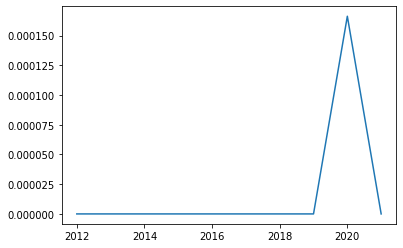

In [223]:
yr=np.arange(2012,2022,1)
plt.plot(np.array(yr),np.array(pd))